<a href="https://colab.research.google.com/github/Brian-Lam/Generative-Deep-Learning/blob/main/Generative_Deep_Learning_Chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Hide TensorFlow verbose logs so they don't pollute the notebook
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
from tensorflow.keras import datasets, utils

# In this case, x is the features (images from the dataset), and
# y is the classification label. x_train is particularly interesting,
# it is a tensor (multi dimensional array) of shape [50,000, 32, 32, 3]:
#
# - 50,000 images
# - 32 pixels x 32 pixels
# - 3 channels per pixel (RGB)
# - Each channel has a value from 0 to 255
#
# The value of each dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
# CIFAR-10 dataset contains 10 classifications
NUM_CLASSES = 10

# Normalize the RGB values into values between 0 and 1, by dividing them by 255.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Create one-hot encodings for the labels.
y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

# Build an MLP - Multi Layer Perceptron
#
# For context, a neural network consists of series of stacked layers. Neural
# networks where adjacent layers are fully connected are called multilayer
# perceptrons.
#
# This MLP will classify an image. Note that it is a discriminative (not
# generative) model that uses supervised learning.

from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(200, activation = 'relu'),
    layers.Dense(150, activation = 'relu'),
    layers.Dense (10, activation = 'softmax')
])

print (model.summary())

# Define the optimizer and loss function
from tensorflow.keras import optimizers

# Optimizers are used to update the weights in neural networks, based on the
# gradient of the loss function. Adam (Adapative moment estimation) is a common
# optimizer.
#
# The learning rate is the most common tweak for the Adam optimizer, it affects
# how aggressively we change the weights during each training step. A higher
# learning rate could mean faster training, but a less stable training.
opt = optimizers.Adam(learning_rate = 0.0005)
# There are multiple types of loss functions - your choice of loss function will
# be affected byr the type of problem you are trying to solve. For example, if
# you are trying to solve a regression problem (with a continuous output), a
# mean squared error loss function may be used.
#
# In this case, we are trying to solve a classification problem (classifying
# images with a predefined set of labels), so a categorical cross-entropy loss
# function would be more appropriate.
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# Train the model across 10 epochs, with a batch size of 32. An epoch represents
# a complete pass through the entire training dataset, while a batch is a subset
# of the training data used to compute a single gradient update. In other words,
# an epoch consists of multiple batches.
#
# The batch size param affects how many images are processed in each batch.
# The epochs param determines how many times the network will process
# the training data (and errors are backpropagated, updating the weights to
# improve the model).
model.fit(x_train,
          y_train,
          batch_size = 32,
          epochs = 10,
          shuffle = True)

# We can use model.evaluate() to evaluate the accuracy of the trained model
# on our test dataset.
model.evaluate(x_test, y_test)

CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

# This will be an array of shape [10000, 10]:
#   10,000 observations
#   10 classification possibilities per observation
predictions = model.predict(x_test)

# We then convert this array of probabilities (one-hot encodings) back into
# a single prediction. The `axis = -1` parameter collapses the array over the
# last dimension (the classes dimension), so the final shape is [10,000, 1]
preds_single = CLASSES[np.argmax(predictions, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.2824 - loss: 1.9665
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ -33s -21230us/step - accuracy: 0.3921 - loss: 1.6870
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4315 - loss: 1.5842   
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4528 - loss: 1.5266  
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4709 - loss: 1.4893
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4779 - loss: 1.4642    
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4896 - loss: 1.4397  
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5035 - loss: 1.4008 
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5076 - loss: 1.3802
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5118 - loss: 1.3694    
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4850 - loss: 1.4565
313/313 ━━━━━━

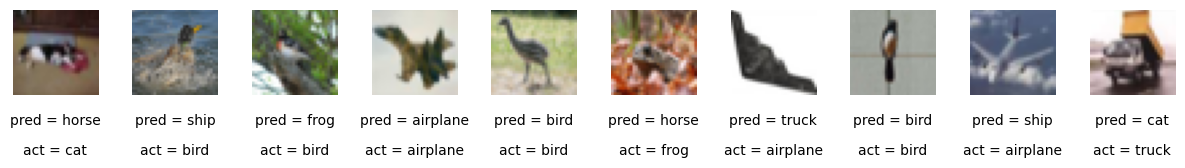

In [2]:
import matplotlib.pyplot as plt

## Show the results
n_to_show = 10
indices = np.random.choice(range(0, len(x_test)), n_to_show)

fig = plt.figure(figsize = (15, 3))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize = 10, ha = 'center', transform = ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize = 10, ha = 'center', transform = ax.transAxes)
    ax.imshow(img)


# Convolutional Network

In [6]:
from tensorflow.keras import layers


# In this example, we use a convolutional network (with 2D Convolutional Layers) 
# to power the neural network.
#
# Our "Vanilla" neural network had a key limitation - we had to flatten all the 
# pixel data into a single long vector at the very beginning (the Flatten layer).
# During that time, we lost information about spatial relationships between pixels,
# because the network did not know that pixel (1,2) was next to pixel (1,1), or that
# a group of pixels formed a shape.
# 
# Then we passed the pixels into a Dense layer, where every neuron in the current layer is connected
# to every neuron in the previous layer. Dense layers are great at learning complex,
# non-linear relationships between inputs and outputs. However, because they receive a flattened
# input, they essentially treat each pixel as an independent feature.
#
# CNNs (Convolutional Neural Networks) are specifically designed to address the
# limitations of traditional dense networks when dealing with structured data like
# images. They exploit the spatial relationships within the data.
# 
# Conv2D layers layers apply "filters" (also called kernels) that slide across
# the input data (e.g., an image). Each filter is a small matrix of learnable weights.
input_layer = layers.Input(shape=(32, 32, 3))

# Each Conv2D layer is a core feature extraction layer. 
#
# Take this function call: 
# layers.Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = "same")
# 
# filters = 32: The layer will learn 32 different filters (also called kernels).
# Each filter is designed to detect a specific feature (e.g., a vertical edge, a
# diagonal line, a specific color blob) in the input image.
# 
# kernel_size = 3: Each filter will be a 3x3 matrix. This means it will look at a
# 3x3 patch of the input image at a time.
#
# strides = 1: The filter will move one pixel at a time across the input image.
#
# padding = "same": This ensures that the output feature map has the same spatial
# dimensions (height and width) as the input feature map
x = layers.Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = "same")(input_layer)
# Then, the Batch Normalization layer normalizes the activations of the previous
# layer for each batch during training, to remediate gradient explosion. 
#
#  It significantly helps with training stability, speeds up convergence, and can
# act as a mild regularizer, reducing the need for extensive dropout (though dropout
# is still used later). It makes the network less sensitive to the initialization of weights.
x = layers.BatchNormalization()(x)
# Finally, we use a LeakyReLU activation function to introduce non-linearity into the
# network.
x = layers.LeakyReLU()(x)

# Then we do the same, with a stride size of 2 (essentially downsampling the spatial
# dimensions of the feature maps)
x = layers.Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = "same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

# Then the network learns with 64 different filters, so it's trying to find 
# more diverse or complex patterns. As we go deeper into a CNN, the filters
# tend to learn more abstract and higher-level features by combining the simpler
# features detected by earlier layers.
x = layers.Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = "same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

# Finally, we learn with 64 different filters again, but downsample with a 
# stride size of 2, so the spatial dimensions are halved. 
x = layers.Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = "same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

# Then we take the multi-dimensional output from the last convolutional block and flatten it into a single 1D vector.
# Convolutional layers are excellent at extracting spatial hierarchies of features.
# However, for the final classification decision, these extracted features typically
# need to be fed into a traditional dense neural network layer, which expects a 1D vector as input.
x = layers.Flatten()(x)
x = layers.Dense(128)(x)

x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
# Dropouts help prevent overfitting. By randomly "dropping out" neurons, the network cannot rely
# on any single neuron or specific combination of neurons to make predictions. This forces the
# network to learn more robust and generalized features, as it needs to be able to make correct
# predictions even when some information is missing.
x = layers.Dropout(rate = 0.5)(x)

output_layer = layers.Dense(10, activation = "softmax")(x)

model = models.Model(input_layer, output_layer)

# Train the model the same way as before
opt = optimizers.Adam(learning_rate = 0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(x_train,
          y_train,
          batch_size = 32,
          epochs = 10,
          shuffle = True)

model.evaluate(x_test, y_test, batch_size=1000)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.3875 - loss: 1.8020
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5864 - loss: 1.1782 
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6531 - loss: 0.9922  
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6866 - loss: 0.9026 
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7056 - loss: 0.8406  
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7240 - loss: 0.7921   
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7431 - loss: 0.7359 
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7551 - loss: 0.7010  
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7652 - loss: 0.6690   
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7817 - loss: 0.6306  
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7252 - loss: 0.8255


[0.8307439684867859, 0.7235999703407288]